In [ ]:
pip install opencv-python pandas seaborn

Note: you may need to restart the kernel to use updated packages.


### Setup

In [1]:
import pandas as pd
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import os
import seaborn as sns
from datetime import datetime

### Creating datapaths

In [447]:
path= r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25DLC_Resnet50_top_viewMay29shuffle1_snapshot_110.csv"
df = pd.read_csv(path, header=[1, 2])

video_path = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25_1.mp4"
cap = cv2.VideoCapture(video_path) 

stim_timestamps = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25_stim_ON_OFF_timestamps.xls - Fiona_Obj.Neutro(lata)_11_06_25_stim_ON_OFF_timestamps.xls.csv"
stim_df = pd.read_csv(stim_timestamps, header=[0])

### Dataframe segmentation

##### Stim window

In [448]:
def get_seg_stim(df, stim_on, stim_off, fps=30, i=0):
    start_sec = stim_on[i]
    end_sec = stim_off[i]
        
    start_frame = start_sec * fps
    end_frame = end_sec * fps
        
    segmento = df[(df.index >= start_frame) & (df.index <= end_frame)]

    return segmento

In [449]:
stim1 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=0)
stim2 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=1)
stim3 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=2)
stim4 = get_seg_stim(df, stim_df['stim_ON'], stim_df['stim_OFF'], fps=30, i=3)

In [450]:
stim1_sorted = stim1.sort_index()
stim2_sorted = stim2.sort_index()
stim3_sorted = stim3.sort_index()
stim4_sorted = stim4.sort_index()

stims_array = np.stack([
    stim1_sorted.values,
    stim2_sorted.values,
    stim3_sorted.values,
    stim4_sorted.values
])

mean_rows = np.mean(stims_array, axis=0)

df_seg_stim = pd.DataFrame(mean_rows, index=stim1_sorted.index, columns=stim1_sorted.columns)

mean_rows_vector = mean_rows

In [451]:
df_seg_stim

bodyparts        nose                           forehead              \
        coords           x           y likelihood           x           y   
5401   13501.0  754.493937   23.390525   0.418433  773.974960  529.186813   
5402   13502.0  754.689120   23.387664   0.397839  643.541875  327.900818   
5403   13503.0  814.406938   13.258038   0.378410  832.154860  515.308199   
5404   13504.0  814.539735   13.088128   0.376743  782.519850  437.012167   
5405   13505.0  814.766775   12.978556   0.362598  721.968385  458.728102   
...        ...         ...         ...        ...         ...         ...   
5996   14096.0  777.163925  167.654964   0.421710  783.202315  414.361548   
5997   14097.0  777.044583  111.063131   0.425194  781.477585  415.397925   
5998   14098.0  777.457927  110.347057   0.405616  661.007390  669.063407   
5999   14099.0  656.417238  360.321378   0.433954  738.475585  787.386037   
6000   14100.0  778.150525  109.684966   0.419553  725.005443  593.018542   

                      R_ear                          ...      L_ear  \
     likelihood           x            y likelihood  ... likelihood   
5401   0.576565  461.729985  1019.650185   0.579595  ...   0.560139   
5402   0.596544  461.508620  1019.432310   0.572875  ...   0.565451   
5403   0.505904  337.430363  1021.299225   0.569766  ...   0.652838   
5404   0.536904  337.826918  1021.990752   0.557604  ...   0.578738   
5405   0.535929  462.149918  1019.689625   0.569806  ...   0.559220   
...         ...         ...          ...        ...  ...        ...   
5996   0.557516  572.589040   690.859245   0.551582  ...   0.747050   
5997   0.614882  572.928145   689.040470   0.546104  ...   0.785326   
5998   0.571166  498.314572   856.694707   0.551537  ...   0.767100   
5999   0.544285  448.206142   691.738628   0.560366  ...   0.680604   
6000   0.553138  467.749190   523.589552   0.536664  ...   0.684085   

            head                               body                         \
               x           y likelihood           x           y likelihood   
5401  846.388710  819.143215   0.792903  924.778550  280.953831   0.503136   
5402  845.268137  818.929400   0.805799  730.160053  283.344148   0.507682   
5403  751.997990  636.315690   0.844165  661.097635  254.661430   0.509571   
5404  747.291245  584.350547   0.814153  661.347673  256.532022   0.513838   
5405  728.547032  595.119875   0.809337  684.971307  245.324340   0.608539   
...          ...         ...        ...         ...         ...        ...   
5996  699.541178  686.887578   0.869223  935.882900  123.748659   0.489254   
5997  697.502428  686.637533   0.864578  923.002125  141.053641   0.543507   
5998  695.019728  686.282668   0.862777  930.697793  152.869873   0.526155   
5999  694.839517  686.341498   0.876232  728.085982  383.781387   0.460840   
6000  695.730050  686.312245   0.866422  907.505517  350.746930   0.433877   

            tail                         
               x           y likelihood  
5401  614.574028  510.288645   0.361552  
5402  614.347438  510.808950   0.355834  
5403  613.640807  510.918635   0.347155  
5404  614.001041  510.233730   0.302461  
5405  614.020421  510.197705   0.330930  
...          ...         ...        ...  
5996  626.642899  510.975462   0.304441  
5997  482.764368  552.926768   0.351618  
5998  482.972996  553.125370   0.386054  
5999  481.391368  552.939135   0.346029  
6000  619.204280  450.801507   0.348023  

[600 rows x 22 columns]

### Box area selection

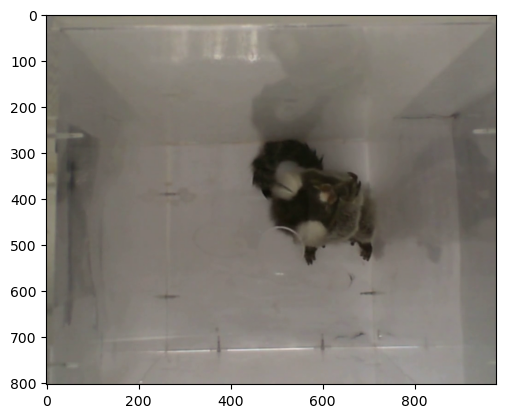

In [452]:
cap = cv2.VideoCapture(video_path) 
numOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
chosenFrameIdx = np.random.randint(1, high=numOfFrames)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 700
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

roi_small = cv2.selectROI('Select the arena, then press space and enter', frame_for_selection) 

x_scale = original_width / display_max_width
y_scale = original_height / display_height

roi_original_scale = (
    int(roi_small[0] * x_scale),
    int(roi_small[1] * y_scale),
    int(roi_small[2] * x_scale),
    int(roi_small[3] * y_scale)
)

roi_cropped = chosenFrame[int(roi_original_scale[1]):int(roi_original_scale[1]+roi_original_scale[3]), int(roi_original_scale[0]):int(roi_original_scale[0]+roi_original_scale[2])]
plt.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()

arenaSide = (roi_original_scale[2] + roi_original_scale[3]) / 2 
xThresholdLeft = roi_original_scale[0]
xThresholdRight = roi_original_scale[0] + arenaSide
yThresholdUp = roi_original_scale[1]
yThresholdDown = roi_original_scale[1] + arenaSide

##### Select stim area

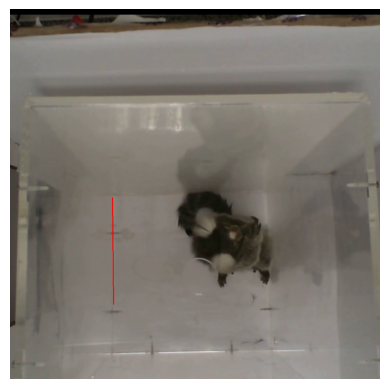

In [453]:
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 700
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

x1, y1, x2, y2 = cv2.selectROI('Selecione a linha (clique e arraste)', frame_for_selection, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

x_scale = original_width / display_max_width
y_scale = original_height / display_height

pt1 = (int(x1 * x_scale), int(y1 * y_scale))
pt2 = (int((x1 + x2) * x_scale), int((y1 + y2) * y_scale))

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, pt1, pt2, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Convert pixel to cm

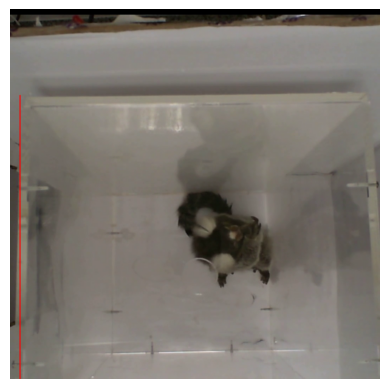

Pixels per cm: 34.21153846153846


In [454]:
py1 = yThresholdDown 
py2 = yThresholdUp
px = xThresholdLeft

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, (px, int(py1)), (px, int(py2)), (0, 0, 255), 2)  
frame_with_line_rgb = cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(frame_with_line_rgb)
plt.axis('off') 
plt.show()

pix_per_cm = (py1-py2) / 26 # 26 cm é a distância entre os dois pontos
print(f"Pixels per cm: {pix_per_cm}")

### Filter coordinates

In [455]:
body_x = df[('body', 'x')].values
body_y = df[('body', 'y')].values
head_x = df[('head', 'x')].values
head_y = df[('head', 'y')].values
nose_x = df[('nose', 'x')].values
nose_y = df[('nose', 'y')].values

body_x_filt = np.where((body_x >= xThresholdLeft) & (body_x <= xThresholdRight), body_x, np.nan)    
body_y_filt = np.where((body_y >= yThresholdUp) & (body_y <= yThresholdDown), body_y, np.nan)
head_x_filt = np.where((head_x >= xThresholdLeft) & (head_x <= xThresholdRight), head_x, np.nan)
head_y_filt = np.where((head_y >= yThresholdUp) & (head_y <= yThresholdDown), head_y, np.nan)
nose_x_filt = np.where((nose_x >= xThresholdLeft) & (nose_x <= xThresholdRight), nose_x, np.nan)
nose_y_filt = np.where((nose_y >= yThresholdUp) & (nose_y <= yThresholdDown), nose_y, np.nan)

body_x_cm = body_x_filt / pix_per_cm
body_y_cm = body_y_filt / pix_per_cm
head_x_cm = head_x_filt  / pix_per_cm
head_y_cm = head_y_filt  / pix_per_cm
nose_x_cm = nose_x_filt  / pix_per_cm
nose_y_cm = nose_y_filt  / pix_per_cm
pt1x = pt1[0]/pix_per_cm
pt1y = pt1[1]/pix_per_cm
pt2x = pt2[0]/pix_per_cm
pt2y = pt2[1]/pix_per_cm


mask_combined = (
    ~np.isnan(body_x_cm) & 
    ~np.isnan(body_y_cm) &
    ~np.isnan(head_x_cm) & 
    ~np.isnan(head_y_cm) &
    ~np.isnan(nose_x_cm) & 
    ~np.isnan(nose_y_cm)
)

body_x = body_x_cm[mask_combined]
body_y = body_y_cm[mask_combined]
head_x = head_x_cm[mask_combined]
head_y = head_y_cm[mask_combined]
nose_x = nose_x_cm[mask_combined]
nose_y = nose_y_cm[mask_combined]

body_x = pd.Series(body_x).rolling(window=59, min_periods=1, center=True).mean().values
body_y = pd.Series(body_y).rolling(window=59, min_periods=1, center=True).mean().values
head_x = pd.Series(head_x).rolling(window=59, min_periods=1, center=True).mean().values
head_y = pd.Series(head_y).rolling(window=59, min_periods=1, center=True).mean().values
nose_x = pd.Series(nose_x).rolling(window=59, min_periods=1, center=True).mean().values
nose_y = pd.Series(nose_y).rolling(window=59, min_periods=1, center=True).mean().values

### Polar plot config

In [456]:
dx = nose_x - head_x
dy = nose_y - head_y
fps = 30

angles_rad = np.arctan2(dy, dx)
angles_deg = (np.degrees(angles_rad) + 360) % 360

bin_size = 20 
bins = np.arange(0, 361, bin_size)
counts, bin_edges = np.histogram(angles_deg, bins=bins)
bin_centers_deg = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
theta = np.deg2rad(bin_centers_deg)

radii = counts/fps
width = np.deg2rad(bin_size)
colors = plt.cm.viridis(radii / np.max(radii))

### Plot and save

In [457]:
figures_to_save = {}

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
animal_name = 'Fiona'
condition = 'aversive'

filename1 = f'histograma_{animal_name}_{condition}_{timestamp}.png'
filename2 = f'heatmap_{animal_name}_{condition}_{timestamp}.png'
filename3 = f'tracking_{animal_name}_{condition}_{timestamp}.png'
filename4 = f'polar_{animal_name}_{condition}_{timestamp}.png'
filename5 = f'direction_{animal_name}_{condition}_{timestamp}.png'

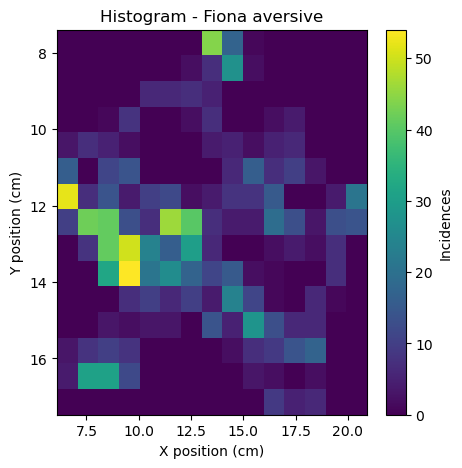

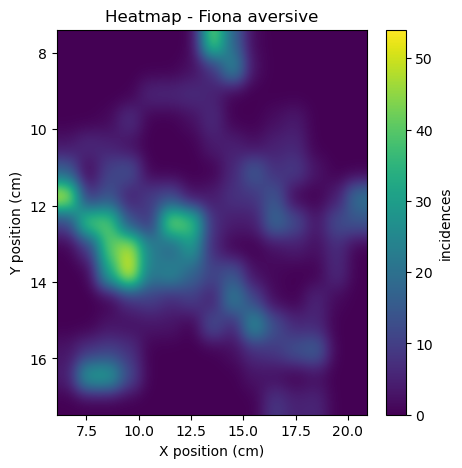

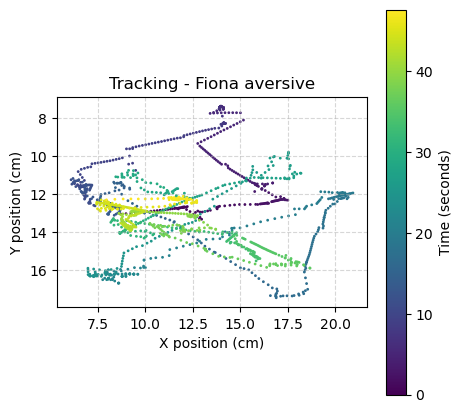

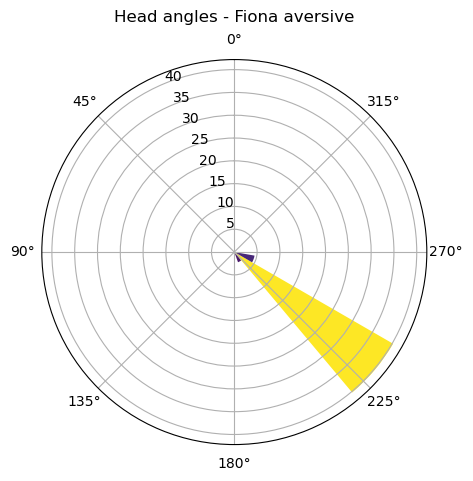

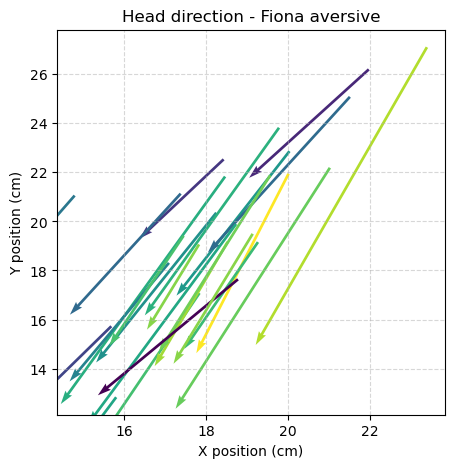

In [458]:
fps = 30

fig1, ax1 = plt.subplots(figsize=(5, 5))
mappable = ax1.hist2d(body_x, body_y, bins=15)[3]
ax1.set_title('Histogram - ' + animal_name +' '+ condition)
ax1.set_xlabel('X position (cm)')
ax1.set_ylabel('Y position (cm)')
fig1.colorbar(mappable, ax=ax1, label='Incidences')
ax1.invert_yaxis()
figures_to_save[filename1] = fig1

fig2, ax2 = plt.subplots(figsize=(5, 5))
h, xedges, yedges = np.histogram2d(body_x, body_y, bins=15)
im = ax2.imshow(h.T, origin='lower', cmap='viridis',
               interpolation='gaussian',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               aspect='auto', vmin=0, vmax=np.max(h))
fig2.colorbar(im, ax=ax2, label='incidences', orientation='vertical', shrink=1.0)
ax2.set_title('Heatmap - ' + animal_name +' '+ condition)
ax2.set_xlabel('X position (cm)')
ax2.set_ylabel('Y position (cm)')
ax2.invert_yaxis()
figures_to_save[filename2] = fig2

fig3, ax3 = plt.subplots(figsize=(5, 5))
time = np.arange(len(body_x))/fps
scatter = ax3.scatter(body_x, body_y, c=time, s=1, cmap='viridis')
fig3.colorbar(scatter, ax=ax3, label='Time (seconds)')
ax3.set_title('Tracking - ' + animal_name +' '+ condition)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.set_xlabel('X position (cm)')
ax3.set_ylabel('Y position (cm)')
ax3.set_aspect('equal', adjustable='box')
ax3.invert_yaxis()
figures_to_save[filename3] = fig3

fig4, ax4 = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
ax4.bar(theta, radii, width=width, bottom=0.0, color=colors)
ax4.set_theta_zero_location('N')  
ax4.set_theta_direction(1)     
ax4.set_title('Head angles - ' + animal_name +' '+ condition, va='bottom')
plt.show()
figures_to_save[filename4] = fig4

fig5, ax5 = plt.subplots(figsize=(5, 5))
f = 60
ax5.quiver(head_x[::f], head_y[::f],
           dx[::f], dy[::f],
           angles_deg[::f], scale=20, cmap='viridis', width=0.007)
ax5.set_title('Head direction - ' + animal_name +' '+ condition)
ax5.set_xlabel('X position (cm)')
ax5.set_ylabel('Y position (cm)')
ax5.grid(True, linestyle='--', alpha=0.5)
plt.show()
figures_to_save[filename5] = fig5

In [ ]:
folder_name = animal_name +' '+ condition
os.makedirs(folder_name, exist_ok=True)

for filename, fig_object in figures_to_save.items():
        full_path = os.path.join(folder_name, filename)

        fig_object.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"- Figura '{filename}' salva com sucesso.")

##### Plot sobre frame


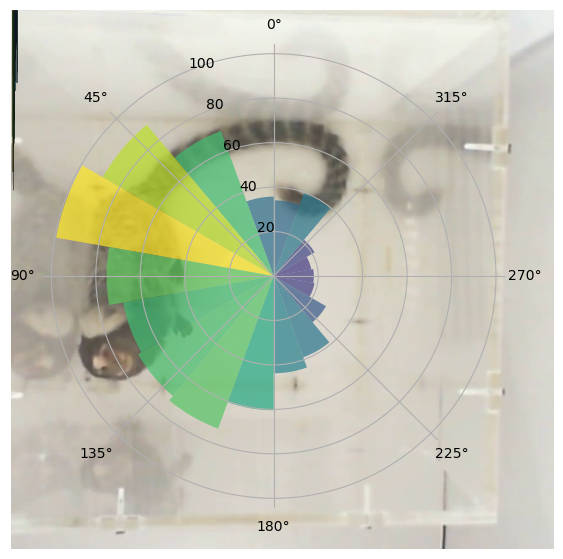

In [446]:
# Selecionar um frame do vídeo (por exemplo, o mesmo usado para seleção da arena)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
_, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(frame_rgb)
ax.axis('off')

# Coordenadas do centro do plot polar (em pixels)
center_x = int(original_width // 2)
center_y = int(original_height // 2)

# Definir raio máximo para o plot polar (em pixels)
max_radius = min(original_width, original_height) // 3

# Normalizar radii para caber no raio máximo
radii_norm = radii / np.max(radii) * max_radius

# Plotar barras polares sobre a imagem
for th, r, c in zip(theta, radii_norm, colors):
    ax.bar(
        th, r, width=width, bottom=0.0,
        color=c, alpha=0.7,
        edgecolor='k',
        linewidth=0.5
    )

# Ajustar o plot polar para o centro da imagem
polar_ax = fig.add_axes([0, 0, 1, 1], polar=True, frameon=False)
polar_ax.set_position([
    (center_x - max_radius) / original_width,
    (center_y - max_radius) / original_height,
    2 * max_radius / original_width,
    2 * max_radius / original_height
])
polar_ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.7)
polar_ax.set_theta_zero_location('N')
polar_ax.set_theta_direction(1)

plt.show()

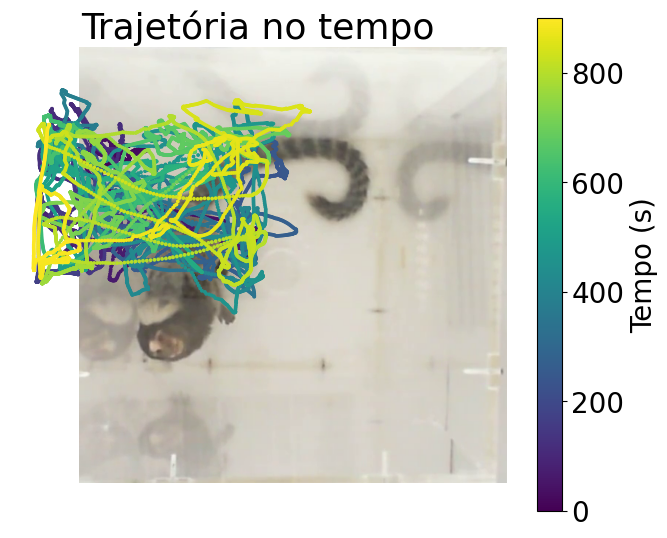

In [436]:
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
success, frame = cap.read()

body_x_pixels = body_x * pix_per_cm
body_y_pixels = body_y * pix_per_cm 

arena_offset_x = -160 
arena_offset_y = -30

body_x_adjusted = body_x_pixels + arena_offset_x
body_y_adjusted = body_y_pixels + arena_offset_y
        

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))

time = np.arange(len(body_x_adjusted)) / fps
scatter = ax.scatter(body_x_adjusted, body_y_adjusted, c=time, s=3, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, label='Tempo (s)', shrink=0.8, orientation='vertical')
cbar.set_label('Tempo (s)', fontsize=20)
cbar.ax.tick_params(labelsize=20)
        
 
ax.set_title('Trajetória no tempo', fontsize=26)
ax.axis('off')
        
plt.show()

##### Single plot

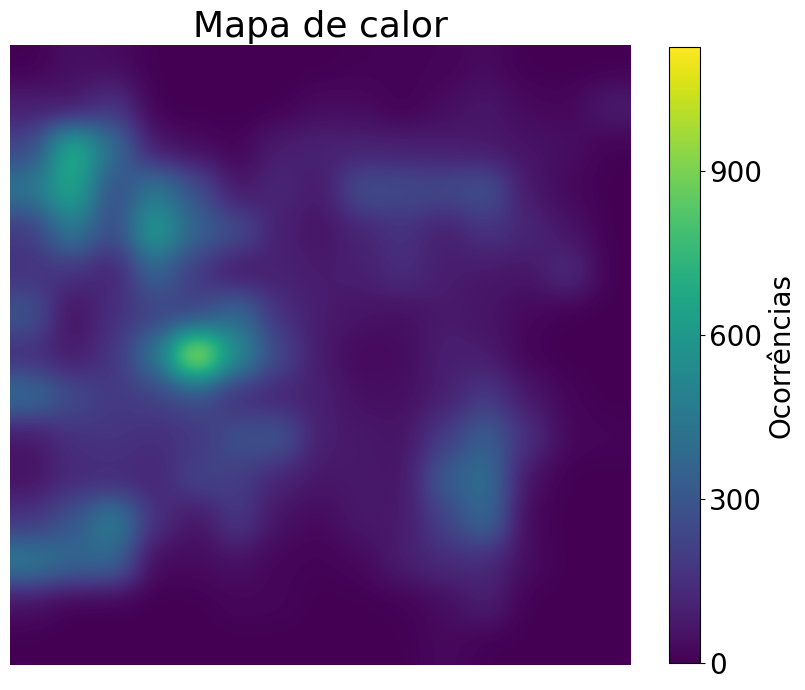

In [442]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(figsize=(10, 10))

# 2. Criar o histograma 2D (seu código aqui está correto)
h, xedges, yedges = np.histogram2d(body_x, body_y, bins=15)

# 3. Desenhar o heatmap usando o objeto 'ax'
# O '.T' transpõe a matriz para que os eixos X e Y correspondam ao scatter plot.
im = ax.imshow(h.T, origin='lower', cmap='viridis',
               interpolation='gaussian')

# 4. CORREÇÃO: Usar a variável 'fig' correta para a colorbar0
cbar = fig.colorbar(im, ax=ax, label='Ocorrências', orientation='vertical', shrink=0.8)
cbar.set_label('Ocorrências', fontsize=20)
cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
cbar.ax.tick_params(labelsize=20)

ax.set_title('Mapa de calor', fontsize=26)
ax.invert_yaxis()
ax.axis('off')

plt.show()

##### Plot behaviors

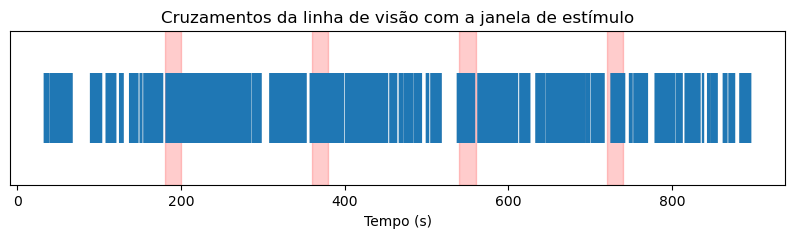

In [438]:
def find_gaze_intersection(head_point, nose_point, line_p1, line_p2):
    """
    Calcula a interseção entre o raio da visão (cabeça->nariz) e um segmento de linha.
    Retorna True se a interseção for válida, caso contrário, False.
    """
    h_x, h_y = head_point
    n_x, n_y = nose_point
    l1_x, l1_y = line_p1
    l2_x, l2_y = line_p2

    gaze_dx = n_x - h_x
    gaze_dy = n_y - h_y
    line_dx = l2_x - l1_x
    line_dy = l2_y - l1_y

    determinant = gaze_dx * line_dy - gaze_dy * line_dx

    # Se as linhas são paralelas, não há interseção.
    if determinant == 0:
        return False

    # --- FÓRMULA CORRIGIDA PARA 'u' ---
    # Calcula 't' (distância ao longo do raio da visão)
    t = ((l1_x - h_x) * line_dy - (l1_y - h_y) * line_dx) / determinant
    # --- LÓGICA DE VERIFICAÇÃO UNIFICADA E CORRIGIDA ---
    # Retorna True apenas se AMBAS as condições forem satisfeitas.
    if t >= 0:
        return True
    else:
        return False

# --- DADOS DE EXEMPLO ---

# --- LOOP PRINCIPAL AJUSTADO ---
crossings = []

# Itera sobre os arrays de trajetória já filtrados e suavizados
for i in range(len(head_x)):
    head_pt = (head_x[i], head_y[i])
    nose_pt = (nose_x[i], nose_y[i])
    
    # A nova função verifica a interseção diretamente
    intersection = find_gaze_intersection(head_pt, nose_pt, (pt1x, pt1y), (pt2x, pt2y))
    
    crossings.append(intersection)

crossings = np.array(crossings)

fps = 30.0

plt.figure(figsize=(10, 2))
times = np.arange(len(crossings)) / fps
plt.eventplot(times[crossings == 1], orientation='horizontal')
plt.xlabel('Tempo (s)')
plt.yticks([])
for _, row in stim_df.iterrows():
    plt.axvspan(row['stim_ON'], row['stim_OFF'], color='red', alpha=0.2)
plt.title('Cruzamentos da linha de visão com a janela de estímulo')
plt.show()

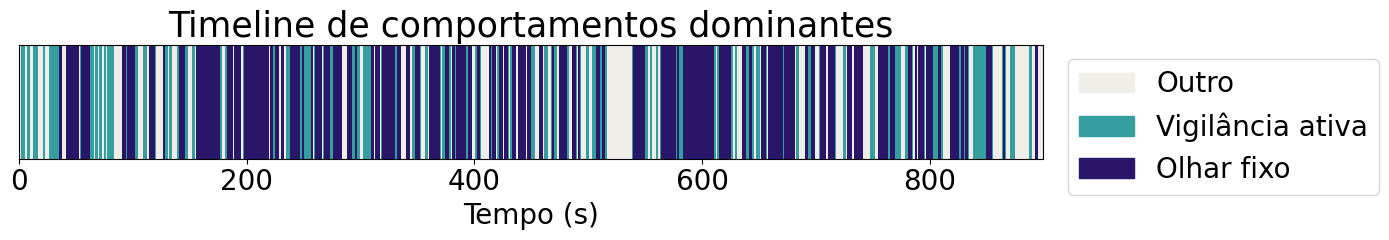

In [439]:

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def calcular_vigilancia_ativa(head_x, head_y, nose_x, nose_y, fps, limiar_velocidade_graus=3.0):
    angulos_rad = np.arctan2(nose_y - head_y, nose_x - head_x)
    diff_angulos = np.diff(angulos_rad)
    diff_angulos[diff_angulos > np.pi] -= 2 * np.pi
    diff_angulos[diff_angulos < -np.pi] += 2 * np.pi
    
    velocidade_angular_rad_s = diff_angulos * fps
    velocidade_angular_graus_s = np.rad2deg(velocidade_angular_rad_s)
    
    vigilancia_ativa = np.abs(velocidade_angular_graus_s) > limiar_velocidade_graus
    
    return np.insert(vigilancia_ativa, 0, False)

def encontrar_periodos_filtrados(boolean_array, fps, duracao_minima_s):
    periodos_frames = []
    if duracao_minima_s <= 0: return periodos_frames

    em_periodo = False
    inicio_frame = 0
    padded_array = np.append(boolean_array, 0)

    for i, status in enumerate(padded_array):
        if not em_periodo and status == 1:
            em_periodo = True
            inicio_frame = i
        elif em_periodo and status == 0:
            em_periodo = False
            fim_frame = i
            duracao_frames = fim_frame - inicio_frame
            if (duracao_frames / fps) >= duracao_minima_s:
                periodos_frames.append((inicio_frame, fim_frame))
    return periodos_frames

def criar_timeline_comportamental_filtrada(crossings_array, vigilancia_ativa_array, fps, duracao_minima_s=2.0):
    """Cria a timeline final onde comportamentos são filtrados e mutuamente exclusivos."""
    n_frames = len(crossings_array)
    timeline_final = np.zeros(n_frames, dtype=int)

    # Encontrar os períodos válidos e filtrados para cada comportamento
    periodos_vigilancia = encontrar_periodos_filtrados(vigilancia_ativa_array, fps, duracao_minima_s)
    periodos_olhar_fixo = encontrar_periodos_filtrados(crossings_array, fps, duracao_minima_s)

    # Marcar a "Vigilância Ativa" primeiro
    for inicio, fim in periodos_vigilancia:
        timeline_final[inicio:fim] = 1

    # Marcar o "Olhar Fixo" com prioridade (sobrescreve a vigilância)
    for inicio, fim in periodos_olhar_fixo:
        timeline_final[inicio:fim] = 2

    return timeline_final

# ==============================================================================
# 2. FUNÇÃO DE PLOTAGEM
# ==============================================================================

def plotar_timeline_comportamental(timeline_array, fps):
    """Plota a timeline de comportamentos como uma única barra colorida."""
    fig, ax = plt.subplots(figsize=(14, 2.5))
    
    cores = {0: "#efeee9", 1: "#359E9E", 2: "#2A1669"}
    labels = {0: 'Outro', 1: 'Vigilância ativa', 2: 'Olhar fixo'}
    
    cmap = ListedColormap([cores[i] for i in sorted(cores.keys())])
    dados_plot = np.expand_dims(timeline_array, axis=0)
    
    ax.imshow(dados_plot, aspect='auto', cmap=cmap, interpolation='none')
    
    locs = np.arange(0, len(timeline_array) + 1, int(200* fps)) # Marca a cada 10 segundos
    ax.set_xticks(locs)
    ax.set_xticklabels([f'{l/fps:.0f}' for l in locs], fontsize=20)
    ax.set_xlabel('Tempo (s)', fontsize=20)
    
    ax.get_yaxis().set_visible(False)
    ax.set_title('Timeline de comportamentos dominantes', fontsize=25)

    legend_patches = [mpatches.Patch(color=cores[i], label=labels[i]) for i in sorted(cores.keys())]
    ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.01, 1.0), fontsize=20)

    plt.tight_layout()
    plt.show()


# Parâmetros necessários (assumindo que já foram definidos nas células anteriores)
fps = 30.0
DURACAO_MINIMA_COMPORTAMENTO = 2.0

# Passo 1: Calcular o comportamento de vigilância ativa
vigilancia_ativa_bool = calcular_vigilancia_ativa(head_x, head_y, nose_x, nose_y, fps, limiar_velocidade_graus=3.0)

# Passo 2: Criar a timeline final com a lógica de filtro e prioridade
timeline_final_filtrada = criar_timeline_comportamental_filtrada(
    crossings, 
    vigilancia_ativa_bool, 
    fps, 
    duracao_minima_s=DURACAO_MINIMA_COMPORTAMENTO
)

# Passo 3: Plotar a visualização da timeline final
plotar_timeline_comportamental(timeline_final_filtrada, fps)